In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [13]:
data = pd.read_csv("C:/Users/ADMIN/Desktop/data sci proj/777preeprocesssed_garments_worker_productivityy.csv")

In [14]:
print(data)

          date   quarter        day      team  targeted_productivity  \
0     01-01-15  Quarter1   Thursday  0.636364               1.000000   
1     01-01-15  Quarter1   Thursday  0.000000               0.931507   
2     01-01-15  Quarter1   Thursday  0.909091               1.000000   
3     01-01-15  Quarter1   Thursday  1.000000               1.000000   
4     01-01-15  Quarter1   Thursday  0.454545               1.000000   
...        ...       ...        ...       ...                    ...   
1192  03-11-15  Quarter2  Wednesday  0.818182               0.931507   
1193  03-11-15  Quarter2  Wednesday  0.636364               0.863014   
1194  03-11-15  Quarter2  Wednesday  0.545455               0.794521   
1195  03-11-15  Quarter2  Wednesday  0.727273               0.931507   
1196  03-11-15  Quarter2  Wednesday  0.454545               0.863014   

           smv       wip  over_time  incentive  idle_time  idle_men  \
0     0.450252  0.047920   0.273148   0.027222        0.0       

In [9]:

missing_values = data.isnull().sum()
missing_values

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [10]:
print(data['wip'])

0       1108.0
1          NaN
2        968.0
3        968.0
4       1170.0
         ...  
1192       NaN
1193       NaN
1194       NaN
1195       NaN
1196       NaN
Name: wip, Length: 1197, dtype: float64


In [15]:
# Handle missing values
data['wip'].fillna(0, inplace=True)


In [16]:
print(data['wip'])

0       1108.0
1          0.0
2        968.0
3        968.0
4       1170.0
         ...  
1192       0.0
1193       0.0
1194       0.0
1195       0.0
1196       0.0
Name: wip, Length: 1197, dtype: float64


In [17]:
#duplicate
duplicate_mask = data.duplicated(keep='first')
duplicate_first_occurrence = data[duplicate_mask]
print("First occurrence of each duplicated row:")
print(duplicate_first_occurrence)

First occurrence of each duplicated row:
Empty DataFrame
Columns: [date, quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []


In [18]:
cat_columns =['department']
cat_columns

['department']

In [19]:
#Encode Categorical Variables

encoder = OneHotEncoder(drop='first', sparse_output=False)
cat_encoded = encoder.fit_transform(data[cat_columns])
cat_encoded

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [20]:
print(data['date'])

0        1/1/2015
1        1/1/2015
2        1/1/2015
3        1/1/2015
4        1/1/2015
          ...    
1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, Length: 1197, dtype: object


In [21]:
# Retrieve the feature names from the encoder
feature_names = encoder.get_feature_names_out(cat_columns)

# Create DataFrame from encoded categorical columns with appropriate column names
cat_encoded_df = pd.DataFrame(cat_encoded, columns=feature_names)
data=pd.concat([data.drop(columns=cat_columns), cat_encoded_df], axis=1)

In [15]:
num_columns = ['wip', 'targeted_productivity', 'over_time', 'smv', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'actual_productivity']
print("Numerical Columns:", num_columns)

# Normalize numerical features
scaler = MinMaxScaler()
data[num_columns] = scaler.fit_transform(dataf[num_columns])

# Output and print the preprocessed data
print(data.head())

Numerical Columns: ['wip', 'targeted_productivity', 'over_time', 'smv', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'actual_productivity']
       date   quarter       day      team  targeted_productivity       smv  \
0  01-01-15  Quarter1  Thursday  0.636364               1.000000  0.450252   
1  01-01-15  Quarter1  Thursday  0.000000               0.931507  0.020132   
2  01-01-15  Quarter1  Thursday  0.909091               1.000000  0.164731   
3  01-01-15  Quarter1  Thursday  1.000000               1.000000  0.164731   
4  01-01-15  Quarter1  Thursday  0.454545               1.000000  0.445219   

        wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
0  0.047920   0.273148   0.027222        0.0       0.0                 0.0   
1  0.000000   0.037037   0.000000        0.0       0.0                 0.0   
2  0.041865   0.141204   0.013889        0.0       0.0                 0.0   
3  0.041865   0.141204   0.013889        0.0       0.0          

In [42]:
dataf

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_sweing
0,1/1/2015,Quarter1,Thursday,8,1.000000,0.450252,0.047920,0.273148,0.027222,0.0,0.0,0.0,59.0,0.797332,0.0,1.0
1,1/1/2015,Quarter1,Thursday,1,0.931507,0.020132,0.000000,0.037037,0.000000,0.0,0.0,0.0,8.0,0.736180,1.0,0.0
2,1/1/2015,Quarter1,Thursday,11,1.000000,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.0,30.5,0.639274,0.0,1.0
3,1/1/2015,Quarter1,Thursday,12,1.000000,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.0,30.5,0.639274,0.0,1.0
4,1/1/2015,Quarter1,Thursday,6,1.000000,0.445219,0.050601,0.074074,0.013889,0.0,0.0,0.0,56.0,0.639062,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,Wednesday,10,0.931507,0.000000,0.000000,0.037037,0.000000,0.0,0.0,0.0,8.0,0.445036,0.0,0.0
1193,3/11/2015,Quarter2,Wednesday,8,0.863014,0.019357,0.000000,0.037037,0.000000,0.0,0.0,0.0,8.0,0.441982,0.0,0.0
1194,3/11/2015,Quarter2,Wednesday,7,0.794521,0.019357,0.000000,0.037037,0.000000,0.0,0.0,0.0,8.0,0.441982,0.0,0.0
1195,3/11/2015,Quarter2,Wednesday,9,0.931507,0.000000,0.000000,0.069444,0.000000,0.0,0.0,0.0,15.0,0.306951,0.0,0.0


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


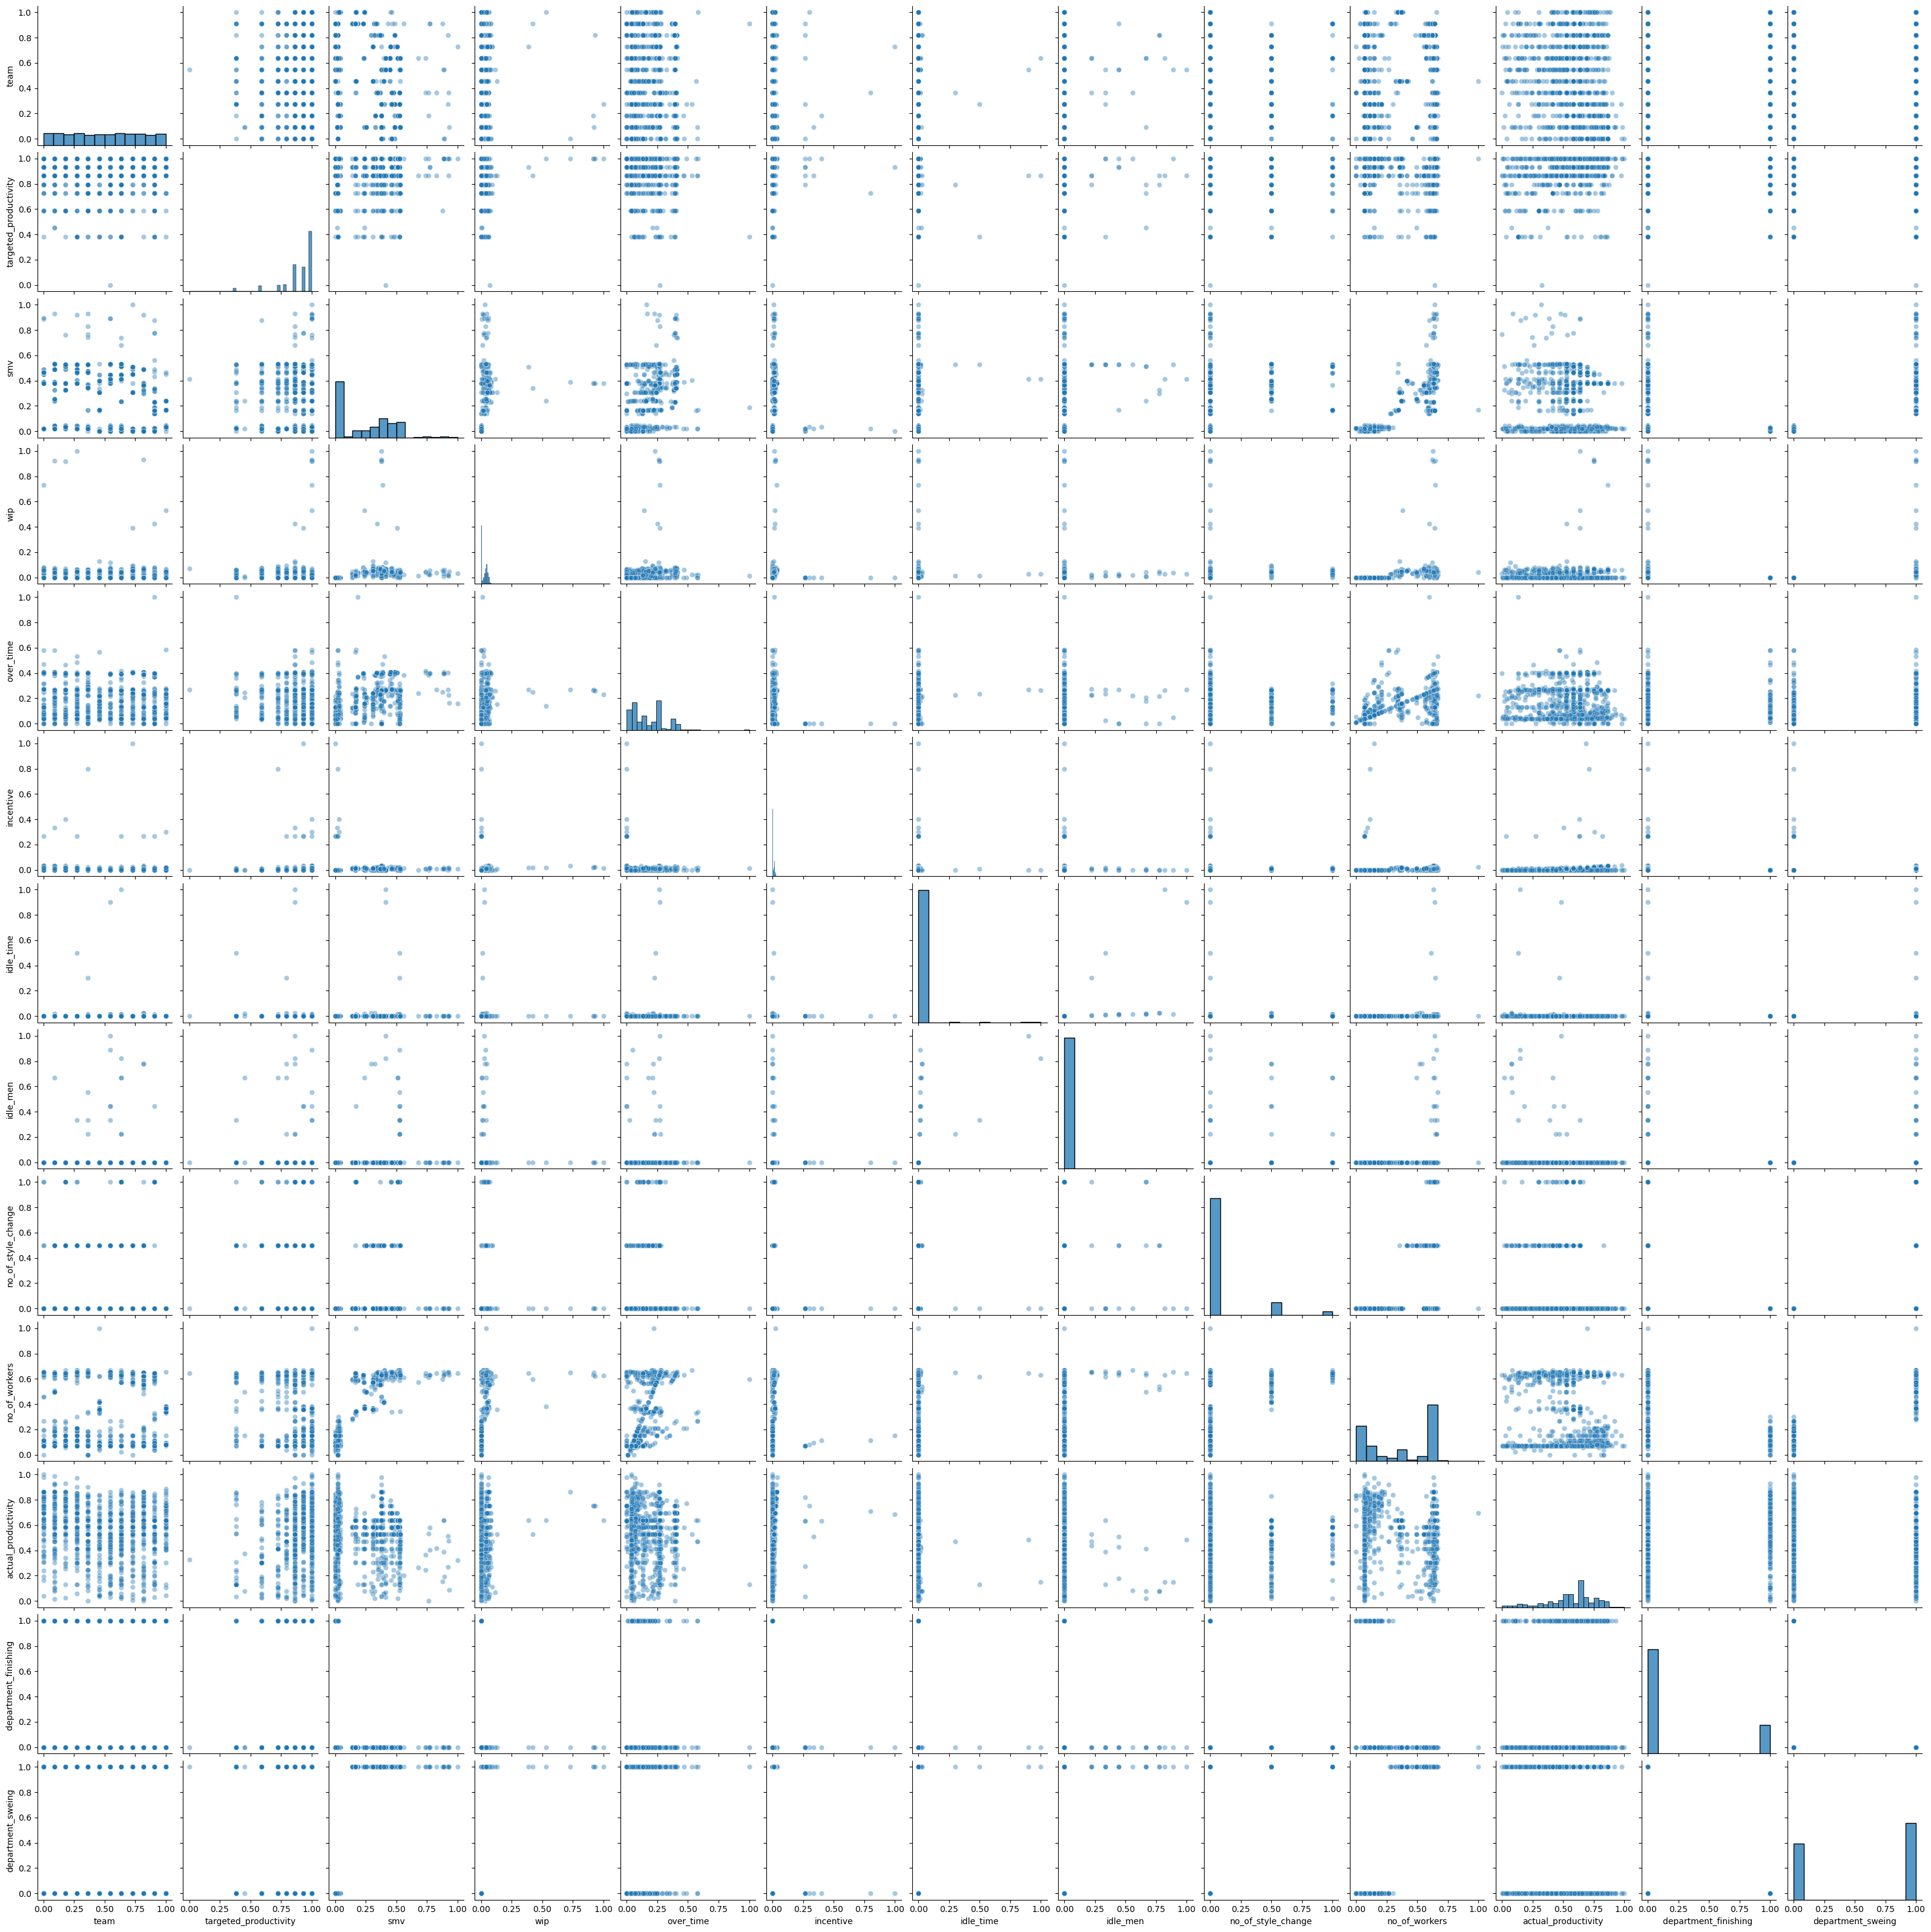

In [86]:
import seaborn as sns
sns.pairplot(data, kind="scatter", plot_kws={'alpha':0.4})

In [27]:
print(data[['actual_productivity', 'targeted_productivity']].head())
print(dataf[['actual_productivity', 'targeted_productivity']].head())

   actual_productivity  targeted_productivity
0             0.940725                   0.80
1             0.886500                   0.75
2             0.800570                   0.80
3             0.800570                   0.80
4             0.800382                   0.80
   actual_productivity  targeted_productivity
0             0.797332               1.000000
1             0.736180               0.931507
2             0.639274               1.000000
3             0.639274               1.000000
4             0.639062               1.000000


In [43]:
output_file_path = 'C:/Users/ADMIN/Desktop/data sci proj/lastpreeprocesssed_garments_worker_productivityy.csv'
dataf.to_csv(output_file_path, index=False)

print(f"Preprocessed dataset saved to 'C:/Users/ADMIN/Desktop/data sci proj'.")

Preprocessed dataset saved to 'C:/Users/ADMIN/Desktop/data sci proj'.


In [163]:
X = data.drop(['actual_productivity','date','quarter','day'], axis=1)

y = data['actual_productivity']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Apply preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Binarize or categorize the target variable for classification
# Example: classify productivity into "high" and "low" based on median
median_productivity = y.median()
y_cls = (y >= median_productivity).astype(int)

# Split the data into training and testing sets for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_preprocessed, y_cls, test_size=0.2, random_state=42)
# Initialize the regression model
regressor = LinearRegression()

# Train the regression model
regressor.fit(X_train_reg, y_train_reg)      

# Predict on the test set
y_pred_reg = regressor.predict(X_test_reg)

# Calculate accuracy metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Regression Mean Squared Error: {mse}")
print(f"Regression R^2 Score: {r2}")

Regression Mean Squared Error: 1.122983670270867e-31
Regression R^2 Score: 1.0


In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Binarize the target variable for classification
median_productivity = y.median()
y_cls = (y >= median_productivity).astype(int)

# Split the data into training and testing sets for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_preprocessed, y_cls, test_size=0.2, random_state=42)

# Initialize the classification model
classifier = LogisticRegression()

# Train the classification model
classifier.fit(X_train_cls, y_train_cls)

# Predict on the test set
y_pred_cls = classifier.predict(X_test_cls)

# Calculate accuracy metrics
accuracy = accuracy_score(y_test_cls, y_pred_cls)
report = classification_report(y_test_cls, y_pred_cls)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.9916666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       123
           1       0.99      0.99      0.99       117

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240



In [165]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Naive Bayes Classification
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_cls, y_train_cls)
y_pred_nb = nb_classifier.predict(X_test_cls)
accuracy_nb = accuracy_score(y_test_cls, y_pred_nb)
report_nb = classification_report(y_test_cls, y_pred_nb)

# Decision Tree Classification
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_cls, y_train_cls)
y_pred_dt = dt_classifier.predict(X_test_cls)
accuracy_dt = accuracy_score(y_test_cls, y_pred_dt)
report_dt = classification_report(y_test_cls, y_pred_dt)

# K-Nearest Neighbors Classification
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_cls, y_train_cls)
y_pred_knn = knn_classifier.predict(X_test_cls)
accuracy_knn = accuracy_score(y_test_cls, y_pred_knn)
report_knn = classification_report(y_test_cls, y_pred_knn)

# Print Classification Reports
print("Naive Bayes Classification Report:")
print(report_nb)
print("\nDecision Tree Classification Report:")
print(report_dt)
print("\nK-Nearest Neighbors Classification Report:")
print(report_knn)


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.20      0.32       123
           1       0.54      0.99      0.70       117

    accuracy                           0.58       240
   macro avg       0.75      0.59      0.51       240
weighted avg       0.76      0.58      0.51       240


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       117

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       123
           1       0.91      0.96      0.93       117

    accuracy                           0.93       240
   macro av

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the regression model
lin_regressor = LinearRegression()

# Train the regression model
lin_regressor.fit(X_train_reg, y_train_reg)

# Predict on the test set
y_pred_lin_reg = lin_regressor.predict(X_test_reg)

# Calculate accuracy metrics
mse_lin = mean_squared_error(y_test_reg, y_pred_lin_reg)
mae_lin = mean_absolute_error(y_test_reg, y_pred_lin_reg)

print(f"Linear Regression Mean Squared Error: {mse_lin}")
print(f"Linear Regression Mean Absolute Error: {mae_lin}")
# Calculate RMSE
rmse_lin = mean_squared_error(y_test_reg, y_pred_lin_reg, squared=False)

print(f"Linear Regression Root Mean Squared Error: {rmse_lin}")



Linear Regression Mean Squared Error: 1.122983670270867e-31
Linear Regression Mean Absolute Error: 2.7220702543869396e-16
Linear Regression Root Mean Squared Error: 3.351094851344657e-16


In [167]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor
dt_regressor.fit(X_train_reg, y_train_reg)

# Predict on the test set
y_pred_dt_reg = dt_regressor.predict(X_test_reg)

# Calculate accuracy metrics
mse_dt = mean_squared_error(y_test_reg, y_pred_dt_reg)
mae_dt = mean_absolute_error(y_test_reg, y_pred_dt_reg)

print(f"Decision Tree Regressor Mean Squared Error: {mse_dt}")
print(f"Decision Tree Regressor Mean Absolute Error: {mae_dt}")
# Calculate RMSE for Decision Tree Regressor
rmse_dt = mean_squared_error(y_test_reg, y_pred_dt_reg, squared=False)

print(f"Decision Tree Regressor Root Mean Squared Error: {rmse_dt}")



Decision Tree Regressor Mean Squared Error: 9.41626312343152e-06
Decision Tree Regressor Mean Absolute Error: 0.001137134979166667
Decision Tree Regressor Root Mean Squared Error: 0.003068593020169263


In [168]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN Regressor
knn_regressor = KNeighborsRegressor()

# Train the regressor
knn_regressor.fit(X_train_reg, y_train_reg)

# Predict on the test set
y_pred_knn_reg = knn_regressor.predict(X_test_reg)

# Calculate accuracy metrics
mse_knn = mean_squared_error(y_test_reg, y_pred_knn_reg)
mae_knn = mean_absolute_error(y_test_reg, y_pred_knn_reg)

print(f"K-Nearest Neighbors Regressor Mean Squared Error: {mse_knn}")
print(f"K-Nearest Neighbors Regressor Mean Absolute Error: {mae_knn}")
# Calculate RMSE for KNN Regressor
rmse_knn = mean_squared_error(y_test_reg, y_pred_knn_reg, squared=False)

print(f"K-Nearest Neighbors Regressor Root Mean Squared Error: {rmse_knn}")


K-Nearest Neighbors Regressor Mean Squared Error: 0.003244030824026889
K-Nearest Neighbors Regressor Mean Absolute Error: 0.03365103054916666
K-Nearest Neighbors Regressor Root Mean Squared Error: 0.05695639405744441


In [169]:
# Classification performance comparison
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"KNN Accuracy: {accuracy_knn}")

# Regression performance comparison
print(f"Linear Regression MSE: {mse_lin}, RMSE: {rmse_lin}, MAE: {mae_lin}")
print(f"Decision Tree Regressor MSE: {mse_dt}, RMSE: {rmse_dt}, MAE: {mae_dt}")
print(f"KNN Regressor MSE: {mse_knn}, RMSE: {rmse_knn}, MAE: {mae_knn}")


Naive Bayes Accuracy: 0.5833333333333334
Decision Tree Accuracy: 1.0
KNN Accuracy: 0.9333333333333333
Linear Regression MSE: 1.122983670270867e-31, RMSE: 3.351094851344657e-16, MAE: 2.7220702543869396e-16
Decision Tree Regressor MSE: 9.41626312343152e-06, RMSE: 0.003068593020169263, MAE: 0.001137134979166667
KNN Regressor MSE: 0.003244030824026889, RMSE: 0.05695639405744441, MAE: 0.03365103054916666


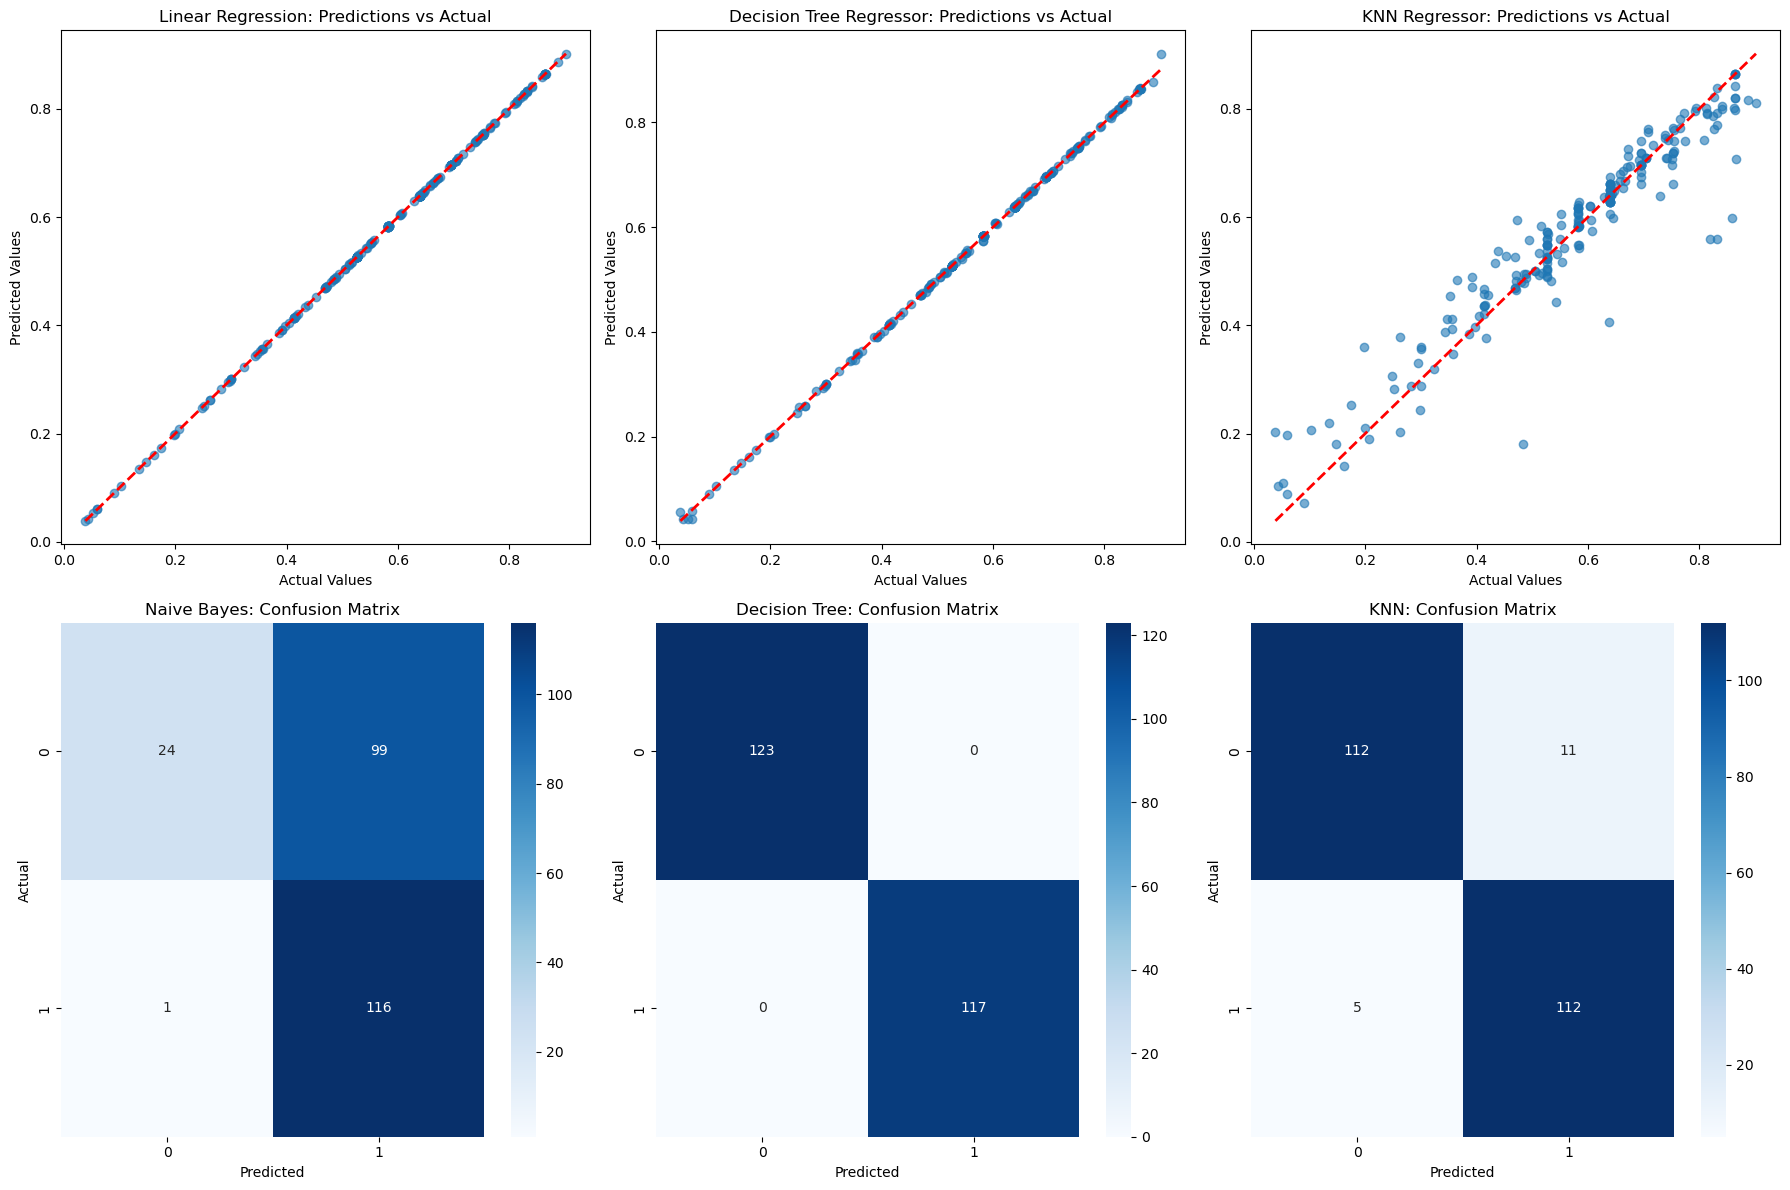

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot regression results
def plot_regression_results(y_true, y_pred, title, ax):
    ax.scatter(y_true, y_pred, alpha=0.6)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r', linewidth=2)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(title)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Linear Regression
plot_regression_results(y_test_reg, y_pred_lin_reg, "Linear Regression: Predictions vs Actual", axs[0, 0])

# Decision Tree Regressor
plot_regression_results(y_test_reg, y_pred_dt_reg, "Decision Tree Regressor: Predictions vs Actual", axs[0, 1])

# K-Nearest Neighbors Regressor
plot_regression_results(y_test_reg, y_pred_knn_reg, "KNN Regressor: Predictions vs Actual", axs[0, 2])

# Naive Bayes Classifier
plot_confusion_matrix(y_test_cls, y_pred_nb, "Naive Bayes: Confusion Matrix", axs[1, 0])

# Decision Tree Classifier
plot_confusion_matrix(y_test_cls, y_pred_dt, "Decision Tree: Confusion Matrix", axs[1, 1])

# K-Nearest Neighbors Classifier
plot_confusion_matrix(y_test_cls, y_pred_knn, "KNN: Confusion Matrix", axs[1, 2])

plt.tight_layout()
plt.show()


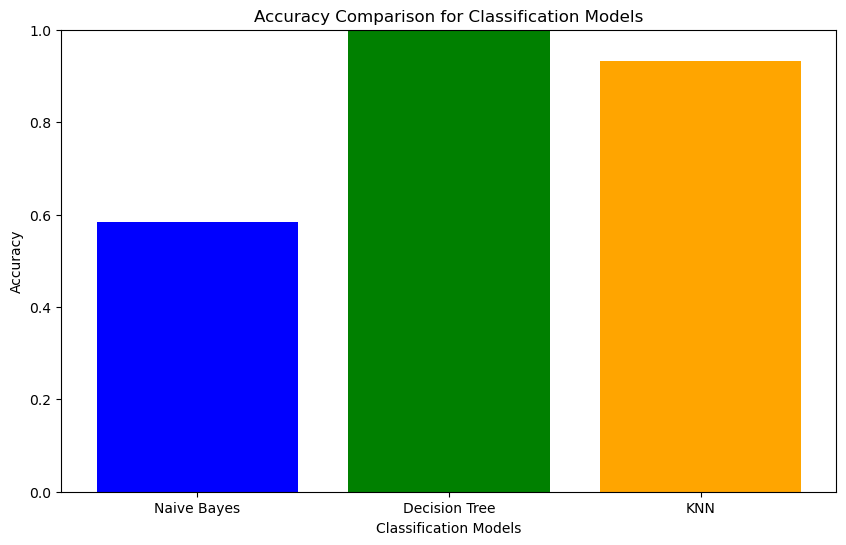

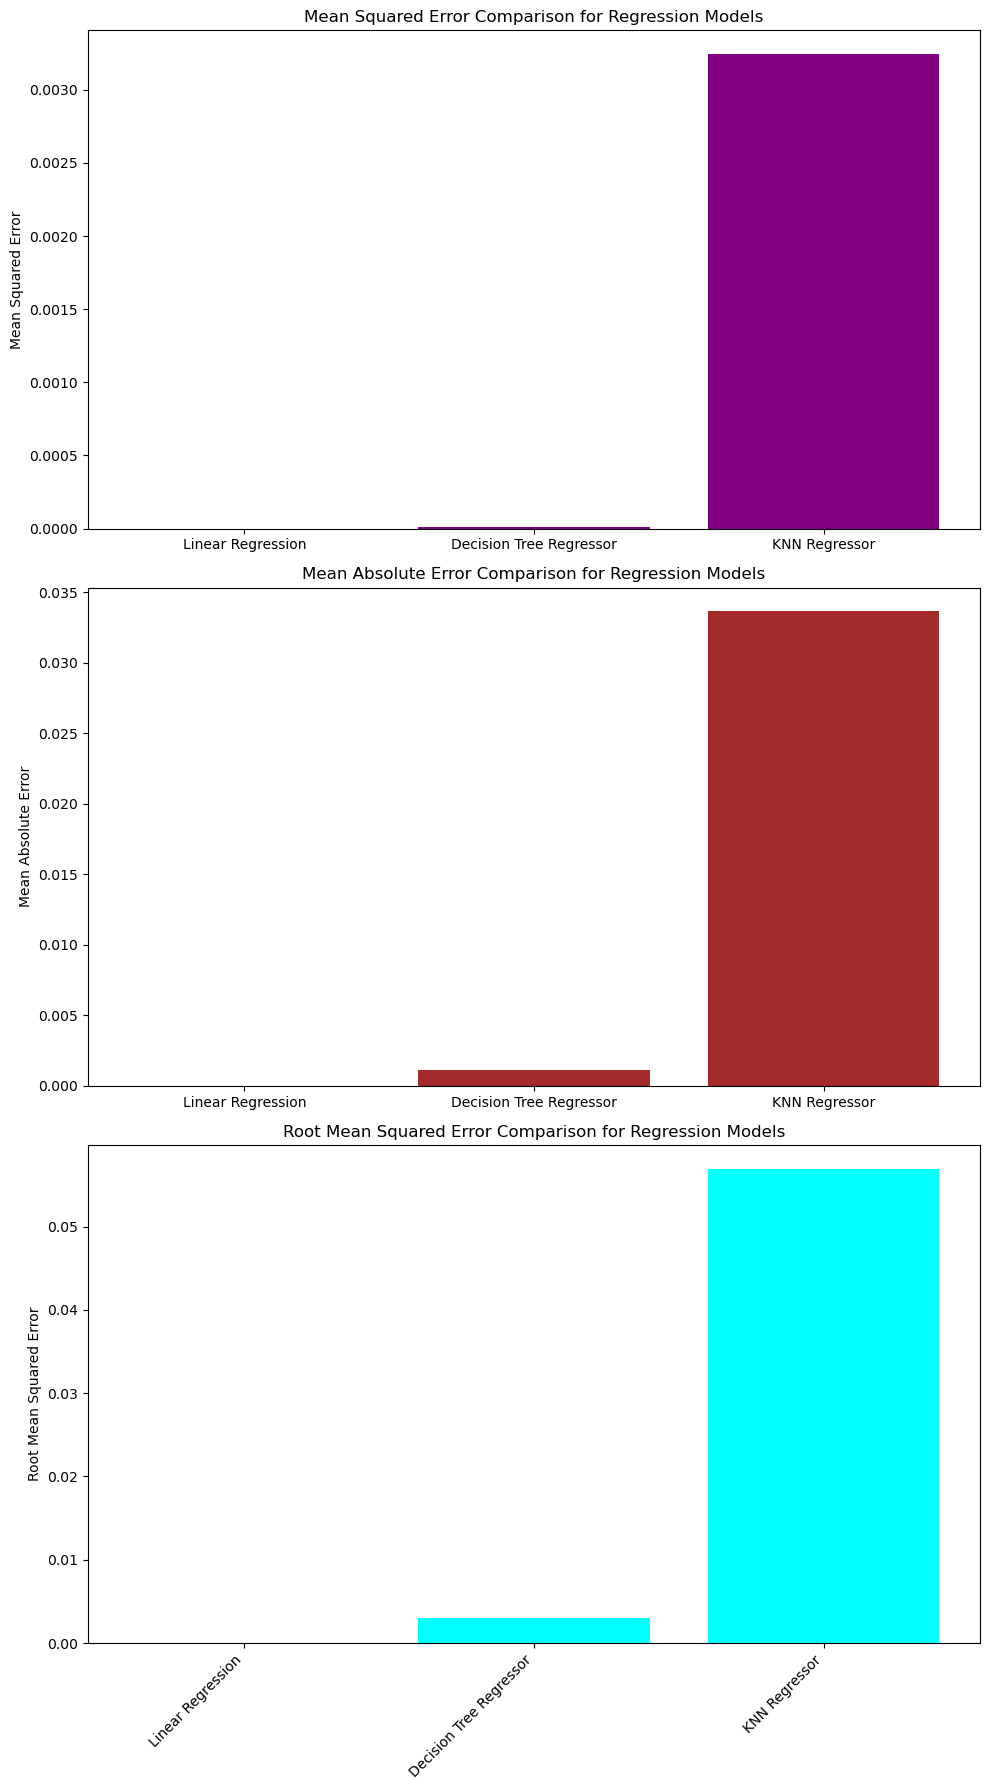

In [181]:
import matplotlib.pyplot as plt

# Classification performance comparison
class_models = ['Naive Bayes', 'Decision Tree', 'KNN']
class_accuracies = [accuracy_nb, accuracy_dt, accuracy_knn]

plt.figure(figsize=(10, 6))
plt.bar(class_models, class_accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Classification Models')
plt.ylim(0, 1)
plt.show()

# Regression performance comparison
reg_models = ['Linear Regression', 'Decision Tree Regressor', 'KNN Regressor']
reg_mses = [mse_lin, mse_dt, mse_knn]
reg_maes = [mae_lin, mae_dt, mae_knn]
reg_rmses = [rmse_lin, rmse_dt, rmse_knn]

fig, axs = plt.subplots(3, figsize=(10, 18))

axs[0].bar(reg_models, reg_mses, color='purple')
axs[0].set_ylabel('Mean Squared Error')
axs[0].set_title('Mean Squared Error Comparison for Regression Models')

axs[1].bar(reg_models, reg_maes, color='brown')
axs[1].set_ylabel('Mean Absolute Error')
axs[1].set_title('Mean Absolute Error Comparison for Regression Models')

axs[2].bar(reg_models, reg_rmses, color='cyan')
axs[2].set_ylabel('Root Mean Squared Error')
axs[2].set_title('Root Mean Squared Error Comparison for Regression Models')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
